In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [14]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
gdf = pd.read_csv('regssdatacsv.csv')

In [16]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [17]:
PHOdf = gdf[gdf.Tm == 'PHO']
PHIdf = gdf[gdf.Tm == 'PHI']


In [18]:
PHOdf.Date = PHOdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PHOdf = PHOdf[(PHOdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (PHOdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

PHIdf.Date = PHIdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PHIdf = PHIdf[(PHIdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (PHIdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

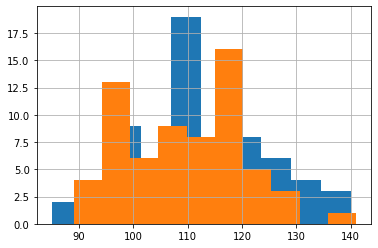

In [19]:
PHOdf.TeamPTS.hist()
PHIdf.TeamPTS.hist()

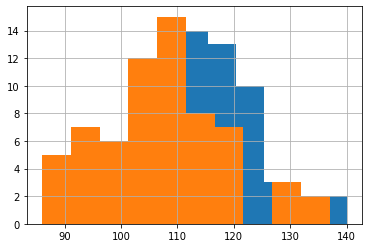

In [20]:
PHOdf.OpponentPTS.hist()
PHIdf.OpponentPTS.hist()

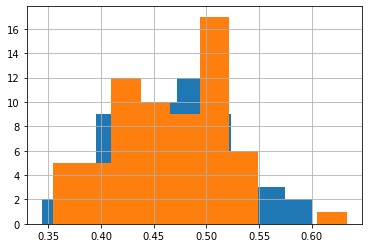

In [21]:
PHOdf.TeamFGP.hist()
PHIdf.TeamFGP.hist()

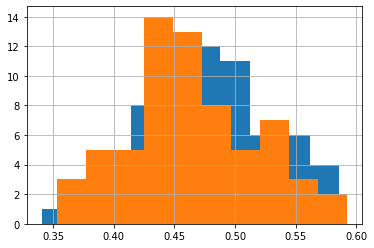

In [22]:
PHOdf.OpponentFGP.hist()
PHIdf.OpponentFGP.hist()

In [23]:
PHOmeanpts = PHOdf.TeamPTS.mean()
PHImeanpts = PHIdf.TeamPTS.mean()
PHOfgp = PHOdf.TeamFGP.mean()
PHIfgp = PHIdf.TeamFGP.mean()
PHOsdpts = PHOdf.TeamPTS.std()
PHIsdpts = PHIdf.TeamPTS.std()

PHOmeaPHIp = PHOdf.OpponentPTS.mean()
PHImeaPHIp = PHIdf.OpponentPTS.mean()
PHOfgpopp = PHOdf.OpponentFGP.mean()
PHIfgpopp = PHIdf.OpponentFGP.mean()
PHOsdopp = PHOdf.OpponentPTS.std()
PHIsdopp = PHIdf.OpponentPTS.std()

print("PHO Mean ", PHOmeanpts)
print("PHO FG% ", PHOfgp)
print("PHO Points Standard Deviation ", PHOsdpts)
print("PHI Points Mean ", PHImeanpts)
print("PHI FG% ", PHIfgp)
print("PHI Points Standard Deviation ", PHIsdpts)

print("PHO OppPoints Mean ", PHOmeaPHIp)
print("PHO OppFG% Mean ", PHOfgpopp)
print("PHO OppPoints SD ", PHOsdopp)
print("PHI OppPoints Mean ", PHImeaPHIp)
print("PHI OppFG% Mean ", PHIfgpopp)
print("PHI OppPoints SD ", PHIsdopp)

PHO Mean  112.55384615384615
PHO FG%  0.46533846153846153
PHO Points Standard Deviation  12.27043037299269
PHI Points Mean  109.58461538461539
PHI FG%  0.46556923076923085
PHI Points Standard Deviation  11.309415750399515
PHO OppPoints Mean  113.92307692307692
PHO OppFG% Mean  0.4751692307692309
PHO OppPoints SD  10.751900547559737
PHI OppPoints Mean  107.36923076923077
PHI OppFG% Mean  0.4641384615384616
PHI OppPoints SD  10.945274709276989


In [24]:
def gameSim():
    PHOScore = (rnd.gauss(PHOmeanpts,PHOsdpts)+ rnd.gauss(PHImeaPHIp,PHIsdopp))/2
    PHIScore = (rnd.gauss(PHImeanpts,PHIsdpts)+ rnd.gauss(PHImeaPHIp,PHIsdopp))/2
    if int(round(PHOScore)) > int(round(PHIScore)):
        return 1
    elif int(round(PHOScore)) < int(round(PHIScore)):
        return -1
    else: return 0

In [25]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('PHO Win ', team1win/(team1win+team2win),'%')
    print('PHI Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [26]:
gAmesSim(10000)

PHO Win  0.5514028367325811 %
PHI Win  0.448597163267419 %


[1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1